In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("home.csv")
df.sample(5)

,area,room,price
3,60,5,130
2,20,2,90
1,10,1,20
0,80,4,150
7,120,10,260


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x




array([[0.63636364, 0.33333333],
       [0.        , 0.        ],
       [0.09090909, 0.11111111],
       [0.45454545, 0.44444444],
       [0.54545455, 0.55555556],
       [0.77272727, 0.77777778],
       [0.72727273, 0.66666667],
       [1.        , 1.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.54166667],
       [0.        ],
       [0.29166667],
       [0.45833333],
       [0.625     ],
       [0.83333333],
       [0.375     ],
       [1.        ]])

In [6]:
w = np.ones(shape=(2))

In [7]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.001):

    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b
        
        w_grad = -(2/total_samples)*X.T.dot(y_true-y_predicted)
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.79044186, 0.80222842]), -0.22667291580919005, 0.07551130907301287)

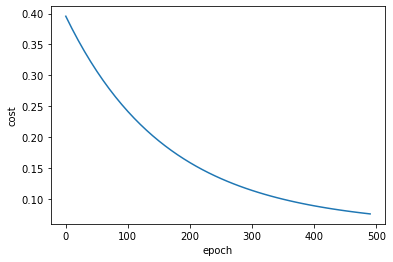

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [9]:
sx.transform([[80,4]])

array([[0.63636364, 0.33333333]])

In [10]:
w

array([0.79044186, 0.80222842])

In [11]:
sy.inverse_transform([[1,0.5,0]])

array([[260., 140.,  20.]])

In [12]:
def predict(area,room,w,b):
    scaled_x =sx.transform([[area,room]])[0]
    
    scaled_price = w[0]*scaled_x[0]  +  w[1] * scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])

    

predict(80,4,w,b)

array([[150.4988032]])

In [14]:
predict(20,2,w,b)

array([[4.23726227]])

In [15]:
 (95,8,w,b)

(95, 8, array([0.79044186, 0.80222842]), -0.22667291580919005)

In [16]:
import random
random.randint(0,6)


4

In [17]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*sample_x.T.dot(sample_y-y_predicted)
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
                                     
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
                                     
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: 
           cost_list.append(cost)
           epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
                                     
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_sgd, b_sgd, cost_sgd        

(array([0.69548062, 0.71070726]), -0.23136189658950332, 0.0033525297018252073)

In [18]:
w,b,cost

(array([0.79044186, 0.80222842]), -0.22667291580919005, 0.07551130907301287)

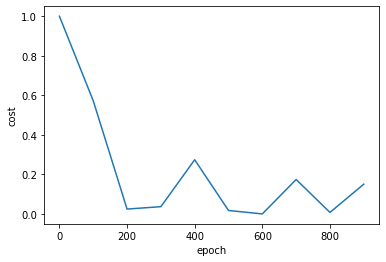

In [19]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)